In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data from kaggle: 
https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

### Features

<ol>
    <li><p><b>Variance</b> -> How pixels are spread.</p></li>
  <li><p><b>Skewness</b> -> How spread is the distribution of pixels.</p></li>
  <li><p><b>Kurtosis</b> -> Measures the shape of the distribution curve.</p></li>
  <li><p><b>Entropy</b> -> Measures the degree of randomness (textures).</p></li>

</ol>

In [2]:
df=pd.read_csv("BankNote_Authentication.csv")

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [20]:
# There aren't any missing values(Nan).
df.isna().any()

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool

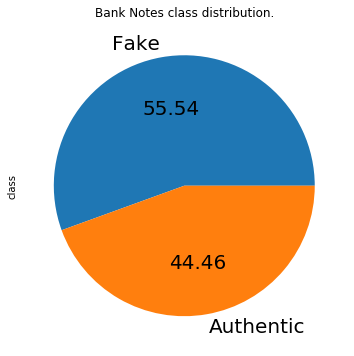

In [15]:
'''
Class 0 means Fake Bank Note.
Class 1 means Authentic Bank Note.
'''
fig=plt.figure(figsize=(8,6))
ax=plt.gca()
df["class"].value_counts().plot(kind='pie', title="Bank Notes class distribution.",fontsize=20,
                                ax=ax,labels=["Fake","Authentic"],autopct='%.2f');


**It is considered a balanced dataset with 55.54% Fake Bank Notes and 44.46 Authentic Bank Notes.**

In [46]:
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(df)

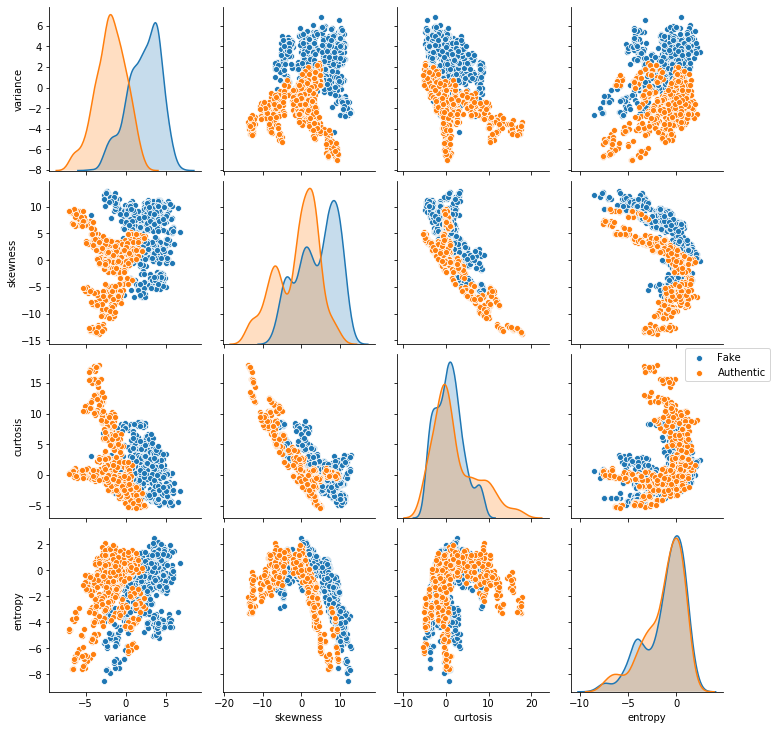

In [32]:
pairplot=sns.pairplot(df,hue='class')
pairplot._legend.remove()
pairplot.fig.legend(labels=["Fake","Authentic"],loc='center right');

**Negative correlation can be spotted between curtosis and skewness which makes sense. The correlation matrix is plotted as well.**

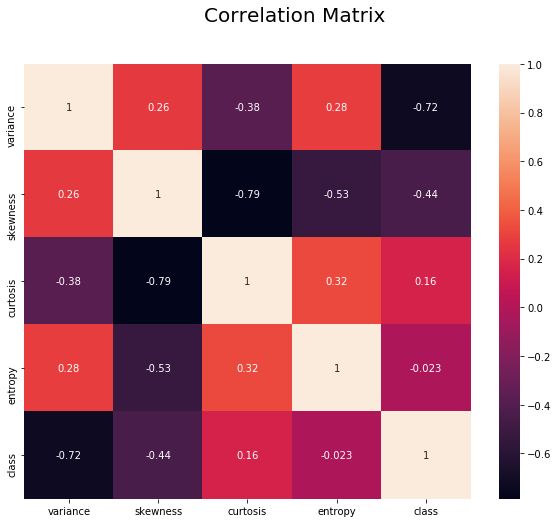

In [71]:
fig=plt.figure(figsize=(10,8))
ax=plt.gca()
sns.heatmap(df.corr(), annot=True,ax=ax)
fig.suptitle("Correlation Matrix",fontsize=20);

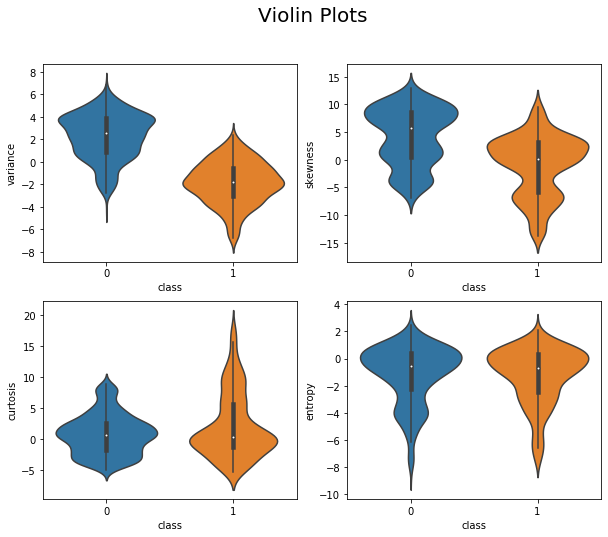

In [63]:
fig,ax=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(x='class',y='variance',data=df,ax=ax[0][0])
sns.violinplot(x='class',y='skewness',data=df,ax=ax[0][1])
sns.violinplot(x='class',y='curtosis',data=df,ax=ax[1][0])
sns.violinplot(x='class',y='entropy',data=df,ax=ax[1][1])

fig.suptitle("Violin Plots",fontsize=20);

**Outlier values can be spotted for curtosis (really high) and entropy (really low) features.**

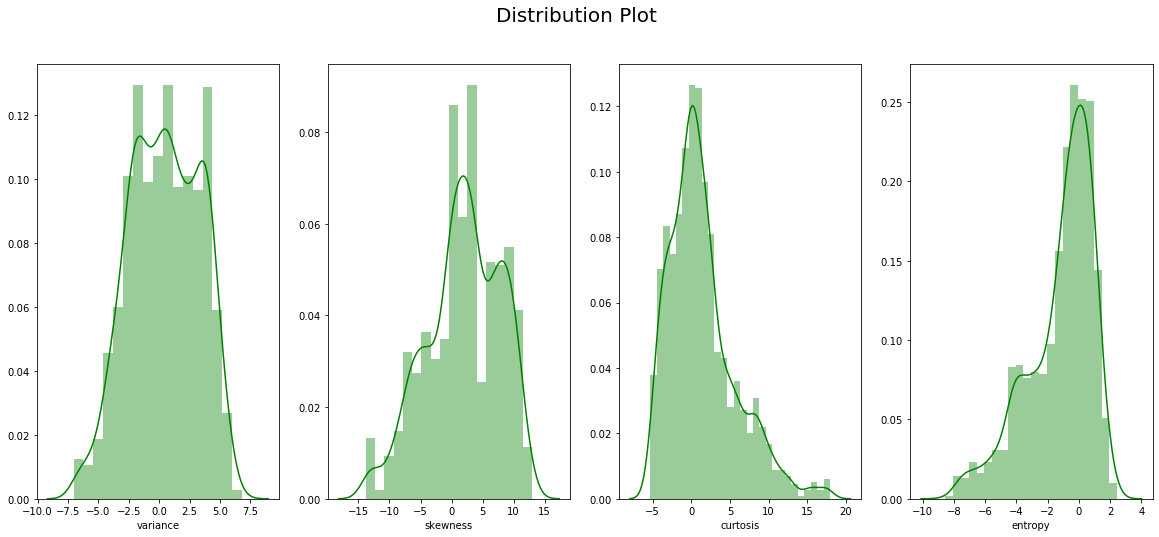

In [64]:
fig,ax=plt.subplots(1,4,figsize=(20,8))
for column,axis in zip(df.columns,ax):
    sns.distplot(df[column],ax=axis,color='green')
    
fig.suptitle('Distribution Plot', fontsize=20);

**As we can see the feature values are not normalized.** 